# RBOB COT MM Nowcasting EDA 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import scipy.stats as stats

In [5]:
import sys
sys.path.append('../../../')

In [6]:
import matplotlib.pyplot as plt 

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [8]:
from src.utils.dates import get_nyse_business_dates
from src.utils.io.read import PreprocessedDataReader

In [9]:
from src.preprocessing.base import FutureTicker

In [10]:
from src.settings import Settings

In [11]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.RBOB)

In [14]:
dataset.shape

(809, 81)

In [15]:
dataset.tail(3)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
806,2025-06-17,XB,-57590.0,137454.0,195044.0,30752.0,75785.0,45033.0,285.0,3341.0,...,191829.0,39197.0,-201086.0,-147137.0,18.39,-18.62,18.57,-18.76,18.30,-18.46
807,2025-06-24,XB,-60881.0,128882.0,189763.0,36136.0,80365.0,44229.0,-3291.0,285.0,...,39197.0,-192059.0,-147137.0,100858.0,-18.62,3.50,-18.76,2.69,-18.46,2.10
808,2025-07-01,XB,-59728.0,120966.0,180694.0,30518.0,78539.0,48021.0,1153.0,-3291.0,...,-192059.0,NaN,100858.0,NaN,3.50,NaN,2.69,NaN,2.10,NaN


In [16]:
dataset['tradeDate'].min(),dataset['tradeDate'].max()

('2010-01-05', '2025-07-01')

In [17]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date 

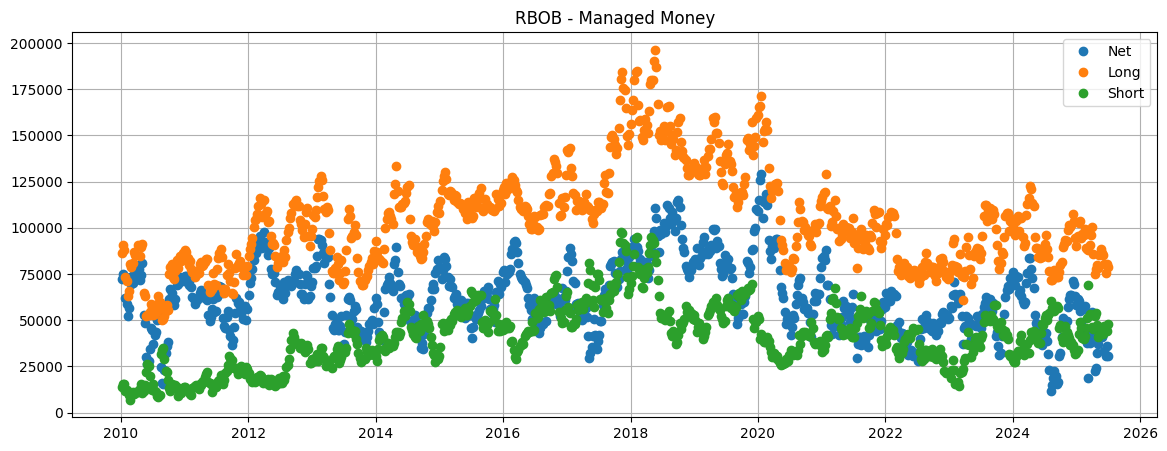

In [18]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_NetPosition'])
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_LongPosition'])
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_ShortPosition'])
plt.legend(['Net', 'Long', 'Short'])
plt.title('RBOB - Managed Money')
plt.grid()

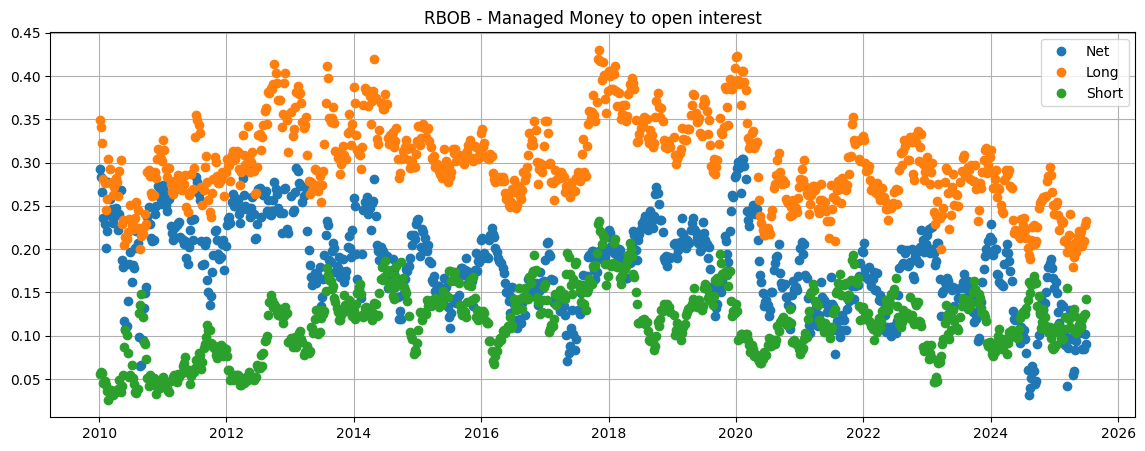

In [19]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_NetPosition_to_openinterest'])
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_LongPosition_to_openinterest'])
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_ShortPosition_to_openinterest'])
plt.legend(['Net', 'Long', 'Short'])
plt.title('RBOB - Managed Money to open interest')
plt.grid()

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate'])
dataset['year']=dataset['tradeDate'].dt.year
dataset['day_of_week'] = dataset['tradeDate'].dt.day_name()
dataset['day_of_week'].unique()
dataset.sort_values(by = 'tradeDate', ascending = True, inplace = True)


In [21]:




# for feature_name in [
#                     'ManagedMoney_NetPosition',
#                     'ManagedMoney_LongPosition', 
#                     'ManagedMoney_ShortPosition']:
#     dataset[f'prior_report_{feature_name}_change'] = dataset[feature_name]- dataset[feature_name].shift(1)






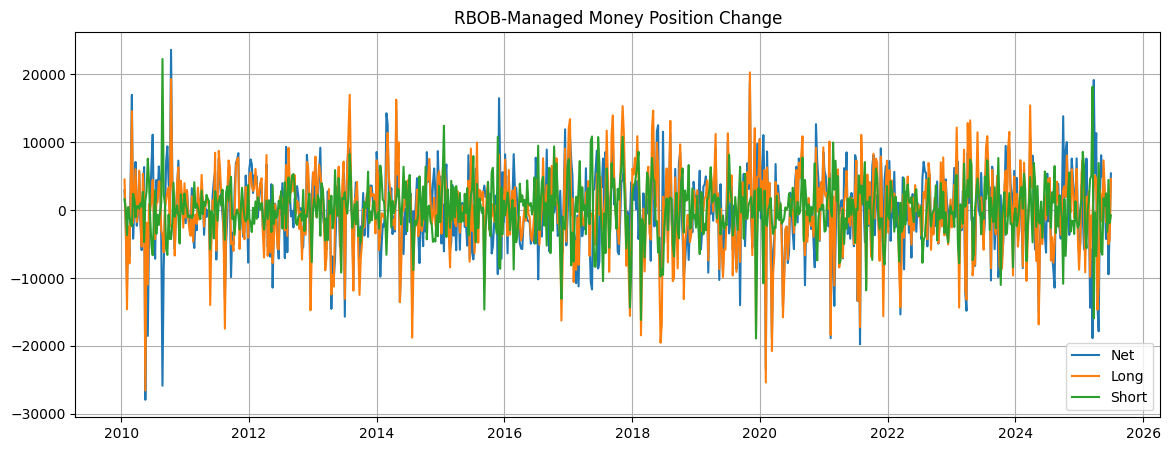

In [22]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_NetPosition_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_LongPosition_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_ShortPosition_change'], '-')
plt.legend(['Net', 'Long', 'Short'])
plt.title('RBOB-Managed Money Position Change')
plt.grid()

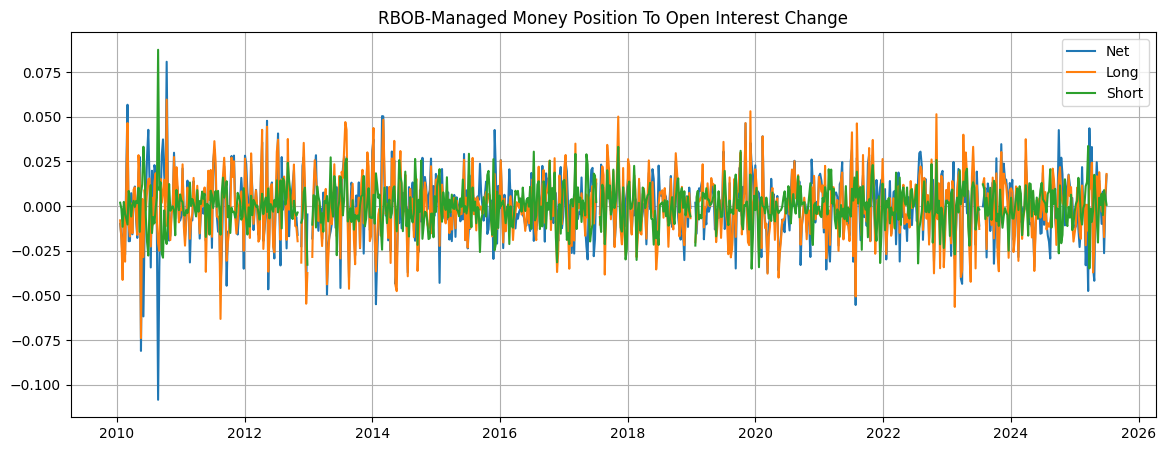

In [23]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_NetPosition_to_openinterest_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_ShortPosition_to_openinterest_change'], '-')
plt.legend(['Net', 'Long', 'Short'])
plt.title('RBOB-Managed Money Position To Open Interest Change')
plt.grid()

In [24]:
dataset[['prior_report_ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change']].corr()

,prior_report_ManagedMoney_NetPosition_change,prior_report_ManagedMoney_LongPosition_change,prior_report_ManagedMoney_ShortPosition_change
prior_report_ManagedMoney_NetPosition_change,1.000000,0.777266,-0.314368
prior_report_ManagedMoney_LongPosition_change,0.777266,1.000000,0.352926
prior_report_ManagedMoney_ShortPosition_change,-0.314368,0.352926,1.000000


In [25]:
dataset[['prior_report_ManagedMoney_NetPosition_to_openinterest_change',
 'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
 'prior_report_ManagedMoney_ShortPosition_to_openinterest_change']].corr()

,prior_report_ManagedMoney_NetPosition_to_openinterest_change,prior_report_ManagedMoney_LongPosition_to_openinterest_change,prior_report_ManagedMoney_ShortPosition_to_openinterest_change
prior_report_ManagedMoney_NetPosition_to_openinterest_change,1.000000,0.797203,-0.326782
prior_report_ManagedMoney_LongPosition_to_openinterest_change,0.797203,1.000000,0.310056
prior_report_ManagedMoney_ShortPosition_to_openinterest_change,-0.326782,0.310056,1.000000


Text(0.5, 1.0, 'MM Long/OI  change')

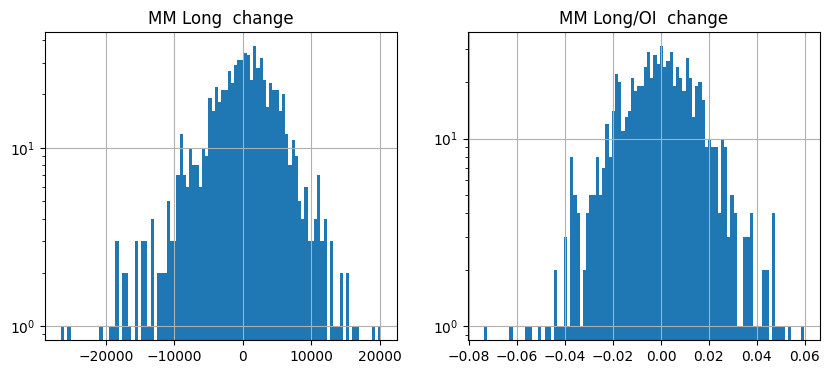

In [26]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1, 2, 1)
dataset['prior_report_ManagedMoney_LongPosition_change'].hist(bins=100, log=True)
plt.title('MM Long  change')
plt.subplot(1, 2, 2)
dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'].hist(bins=100, log=True)
plt.title('MM Long/OI  change')


Text(0.5, 1.0, 'MM Short/OI change')

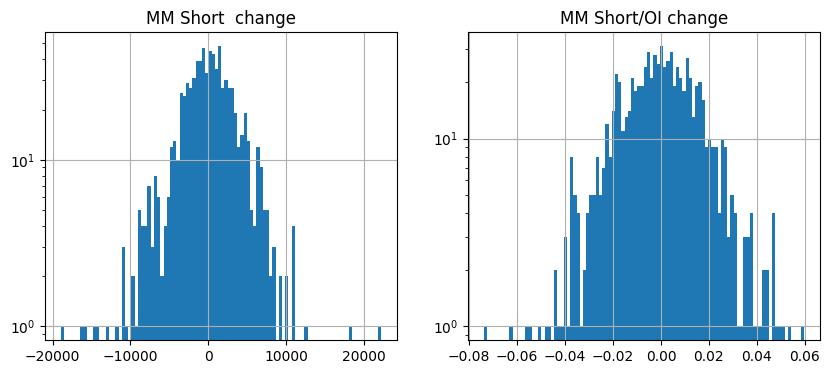

In [27]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1, 2, 1)
dataset['prior_report_ManagedMoney_ShortPosition_change'].hist(bins=100, log=True)
plt.title('MM Short  change')
plt.subplot(1, 2, 2)
dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'].hist(bins=100, log=True)
plt.title('MM Short/OI change')

Text(0.5, 1.0, 'MM Net/OI  change')

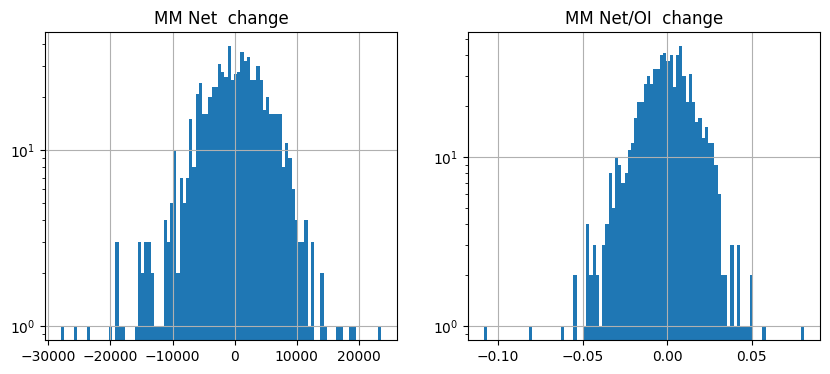

In [28]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1, 2, 1)
dataset['prior_report_ManagedMoney_NetPosition_change'].hist(bins=100, log=True)
plt.title('MM Net  change')
plt.subplot(1, 2, 2)
dataset['prior_report_ManagedMoney_NetPosition_to_openinterest_change'].hist(bins=100, log=True)
plt.title('MM Net/OI  change')



In [29]:
from research.eda.probability_distributions import test_normality_shapiro

In [30]:
for f in ['prior_report_ManagedMoney_NetPosition_change', 
         'prior_report_ManagedMoney_LongPosition_change',
         'prior_report_ManagedMoney_ShortPosition_change']:
    print(f)
    result = test_normality_shapiro(
    dataset[f]
    )
    print(result)


prior_report_ManagedMoney_NetPosition_change
{'statistic': np.float64(0.979643935975979), 'p_value': np.float64(3.6036972194440576e-09), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_ManagedMoney_LongPosition_change
{'statistic': np.float64(0.9772538702946345), 'p_value': np.float64(6.869483955927278e-10), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_ManagedMoney_ShortPosition_change
{'statistic': np.float64(0.9660714079666616), 'p_value': np.float64(9.613948685370535e-13), 'alpha': 0.05, 'verdict': 'Not normal'}


In [31]:
for f in ['prior_report_ManagedMoney_NetPosition_to_openinterest_change', 
         'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
         'prior_report_ManagedMoney_ShortPosition_to_openinterest_change']:
    print(f)
    result = test_normality_shapiro(
    dataset[f]
    )
    print(result)


prior_report_ManagedMoney_NetPosition_to_openinterest_change
{'statistic': np.float64(0.9780582049372221), 'p_value': np.float64(1.4874880581274135e-09), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_ManagedMoney_LongPosition_to_openinterest_change
{'statistic': np.float64(0.9945261990029998), 'p_value': np.float64(0.005747985405437323), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_ManagedMoney_ShortPosition_to_openinterest_change
{'statistic': np.float64(0.9663341534644915), 'p_value': np.float64(1.4441211252982313e-12), 'alpha': 0.05, 'verdict': 'Not normal'}


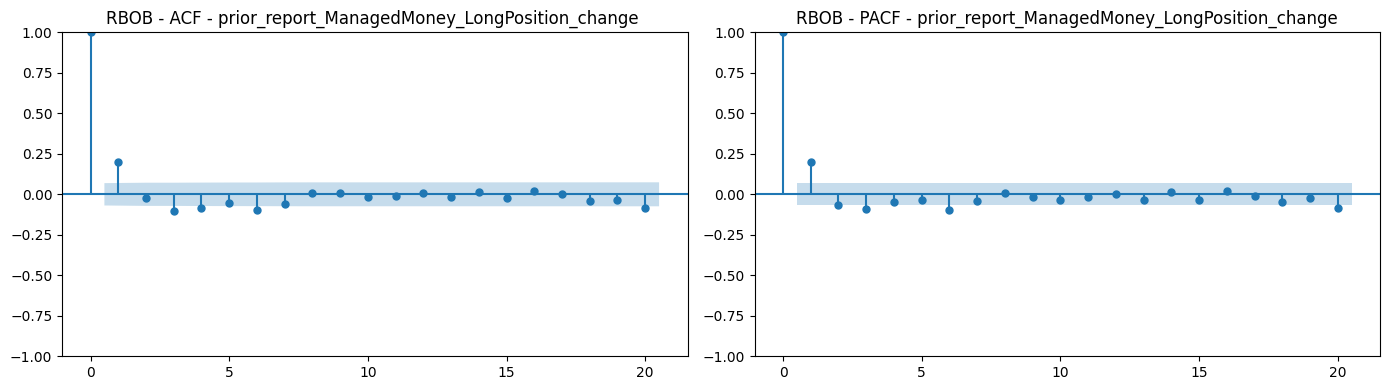

In [32]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_LongPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("RBOB - ACF - prior_report_ManagedMoney_LongPosition_change ")

plot_pacf(dataset['prior_report_ManagedMoney_LongPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("RBOB - PACF - prior_report_ManagedMoney_LongPosition_change")

plt.tight_layout()
plt.show()

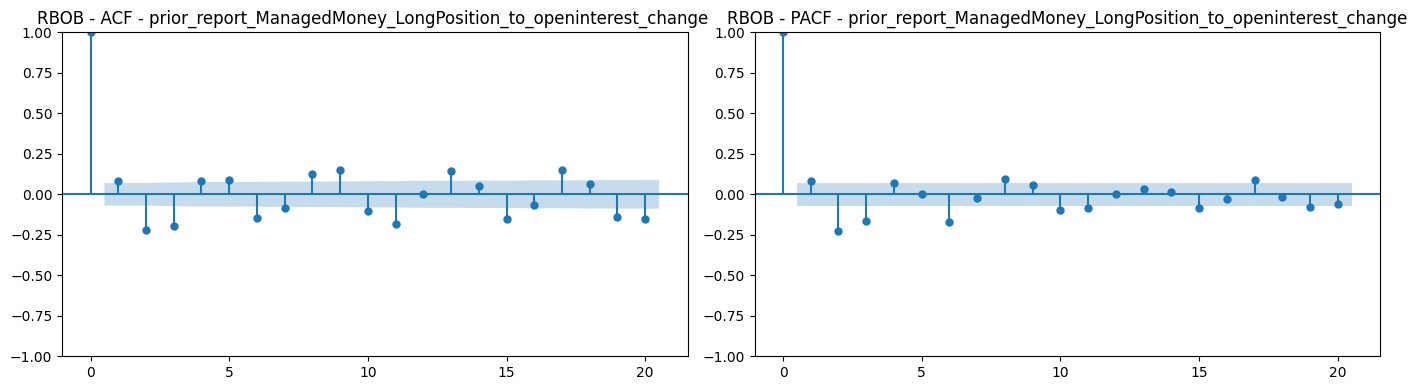

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("RBOB - ACF - prior_report_ManagedMoney_LongPosition_to_openinterest_change ")

plot_pacf(dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("RBOB - PACF - prior_report_ManagedMoney_LongPosition_to_openinterest_change")

plt.tight_layout()
plt.show()

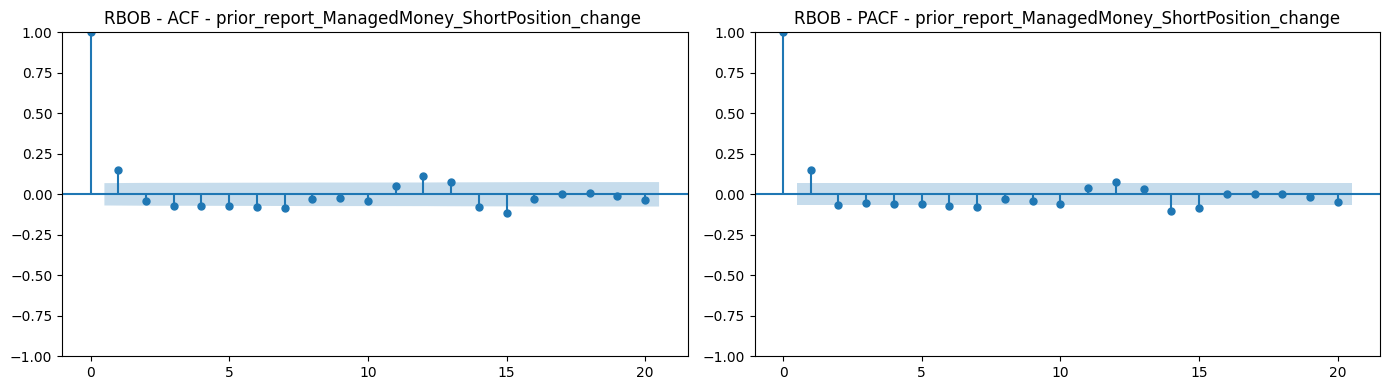

In [34]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_ShortPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("RBOB - ACF - prior_report_ManagedMoney_ShortPosition_change ")

plot_pacf(dataset['prior_report_ManagedMoney_ShortPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("RBOB - PACF - prior_report_ManagedMoney_ShortPosition_change")

plt.tight_layout()
plt.show()

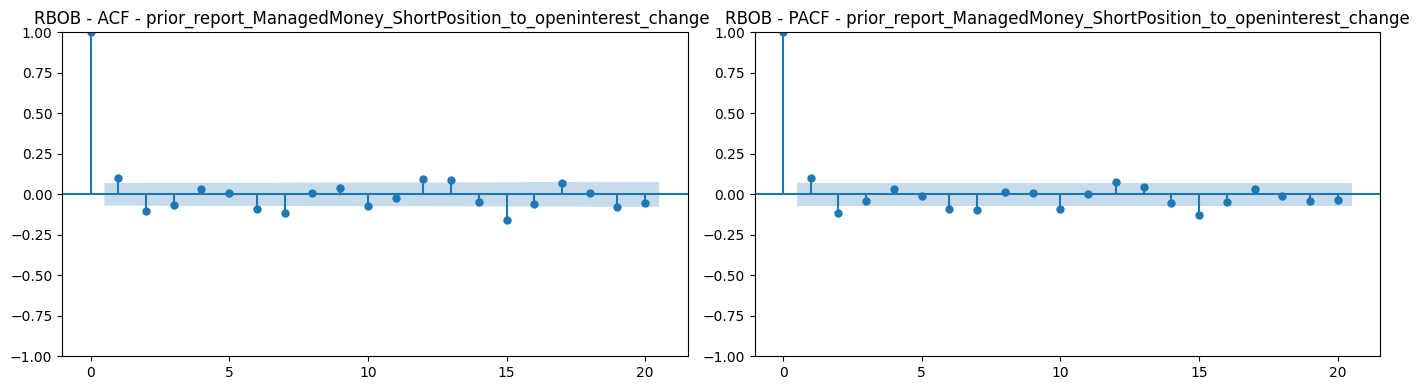

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_ShortPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("RBOB - ACF - prior_report_ManagedMoney_ShortPosition_to_openinterest_change ")

plot_pacf(dataset['prior_report_ManagedMoney_ShortPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("RBOB - PACF - prior_report_ManagedMoney_ShortPosition_to_openinterest_change")

plt.tight_layout()
plt.show()

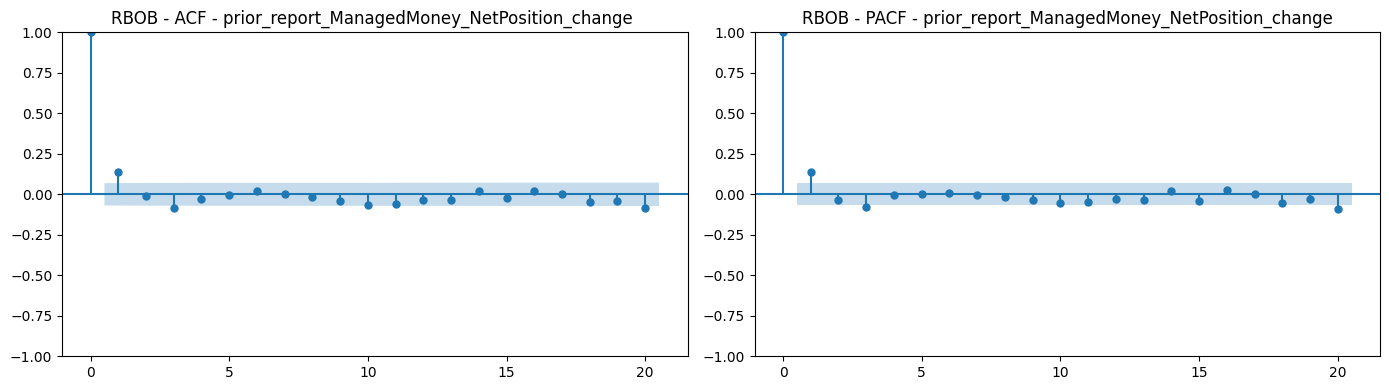

In [36]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("RBOB - ACF - prior_report_ManagedMoney_NetPosition_change ")

plot_pacf(dataset['prior_report_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("RBOB - PACF - prior_report_ManagedMoney_NetPosition_change")

plt.tight_layout()
plt.show()

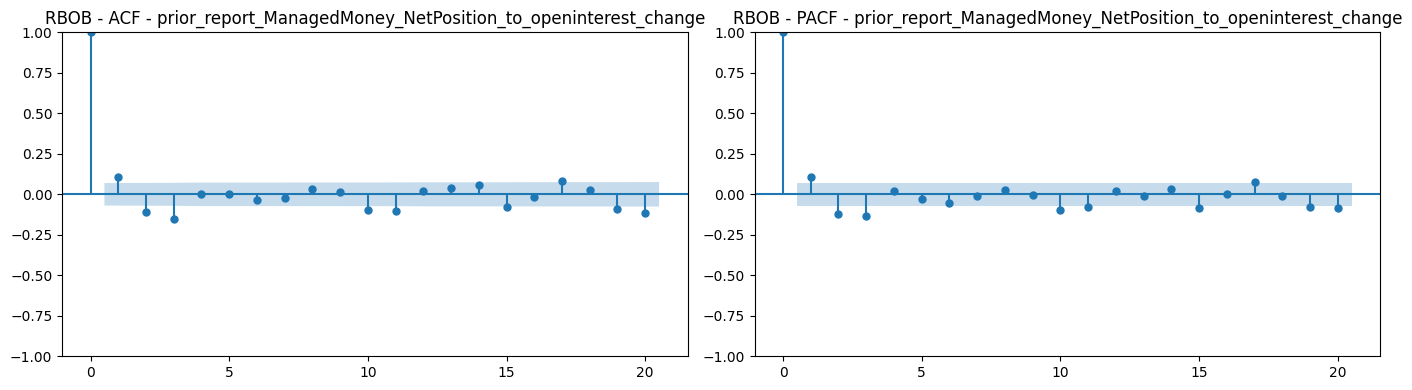

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_NetPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("RBOB - ACF - prior_report_ManagedMoney_NetPosition_to_openinterest_change")

plot_pacf(dataset['prior_report_ManagedMoney_NetPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("RBOB - PACF - prior_report_ManagedMoney_NetPosition_to_openinterest_change")

plt.tight_layout()
plt.show()